In [491]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import t as t 
from scipy.optimize import curve_fit
from uncertainties import *
from uncertainties.umath import *

In [492]:
#Reading data

BK7 = pd.read_csv('data/BK7.csv')
ALAM1 = pd.read_csv('data/ALAM1.csv')
ALAM2 = pd.read_csv('data/ALAM2.csv')
ALAM3 = pd.read_csv('data/ALAM3.csv')
ALAM4 = pd.read_csv('data/ALAM4.csv')
RED = pd.read_csv('data/663_RED.csv')
SIO2 = pd.read_csv('data/SIO2.csv')
TIO2 = pd.read_csv('data/TIO2.csv')
out = pd.read_excel('data/out.xlsx')

In [493]:
# Constants and values

I_0 = 280 

def uncert(data_input, uncert_inst):
    t_coeff = t.ppf((1 + 0.99)/2, len(data_input)-1)
    return np.sqrt((np.std(data_input)/np.sqrt(len(data_input)))**2 + uncert_inst**2)*t_coeff

In [494]:
#Canculations for BK7

BK7['T'] = BK7['T']

BK7['n'] = (1 + np.sqrt(1 - (BK7['T']/100))) / (BK7['T']/100)

In [495]:
# Define the polynomial function

def polynomial_fit(values, A, B):
    return A + B / (values**2)

# Use curve_fit to find the parameters A and B
initial_guess = [1.5, 40000]  # Initial guess for parameters A and B
params, covariance = curve_fit(polynomial_fit, BK7['lambda'][50:], BK7['n'][50:], p0=initial_guess)

# Extract the optimized parameters
A_optimized, B_optimized = params
A_error, B_error = np.sqrt(np.diag(covariance))

A_comb = ufloat(A_optimized, A_error)
B_comb = ufloat(B_optimized, B_error)

# Print the optimized parameters
print('A =', A_comb)
print('B =', B_comb)

#Best-fit line

n_val = polynomial_fit(BK7['lambda'][50:], A_optimized, B_optimized)


A = 1.40272+/-0.00021
B = (1.149+/-0.007)e+04


In [496]:
# Calculation 

out['lambda'] = SIO2['lambda']
out['T_sio2'] = SIO2['T']
out['T_tio2'] = TIO2['T']
out['n_sio2'] = (1 + np.sqrt(1 - (SIO2['T']/100))) / (SIO2['T']/100)
R_sio2 = (A_comb-1)**2 / (A_comb+1)**2
out['T_m'] = out['T_tio2'] / out['T_sio2']
out['T_min'] = out['T_m'] * (1-R_sio2)/(1+R_sio2*(1-out['T_m']))

n_v_list = []
for ii,ID in enumerate(out['T_min']):
    n_v_list.append(((1+sqrt(1-out['T_min'][ii]))/(out['T_min'][ii])) * sqrt(A_comb))
out['n_v'] = n_v_list

print('\nR_sio2 =', R_sio2)

# print(out.iloc[51])
print(f'\n{out.iloc[70]}')
print(f'\n{out.iloc[97]}')
print(f'\n{out.iloc[142]}')
print(f'\n{out.iloc[213]}')
print(f'\n{out.iloc[344]}')

lambda_list = [out.iloc[70]['lambda'], out.iloc[97]['lambda'], out.iloc[142]['lambda'], out.iloc[213]['lambda'], out.iloc[344]['lambda']]
n_v_list = [out.iloc[70]['n_v'], out.iloc[97]['n_v'], out.iloc[142]['n_v'], out.iloc[213]['n_v'], out.iloc[344]['n_v']]

d_list = []
for ii,ID in enumerate(lambda_list):
    if ii == len(lambda_list)-1:
        break
    d_list.append((lambda_list[ii]*lambda_list[ii+1])/(2*(n_v_list[ii]*lambda_list[ii+1]-n_v_list[ii+1]*lambda_list[ii])))

print(f'\n{d_list}')

d_nominal_values = [item.nominal_value for item in d_list]
d_std_devs = [item.std_dev for item in d_list]
d = ufloat(np.mean(d_nominal_values), uncert(d_nominal_values, np.mean(d_std_devs)))

print('\nd =', d.nominal_value, '+-', d.std_dev)

d_2 = ufloat(3.51, 0.02)
d_list_2 = [3.51, 7.02, 10.53, 14.04]
d_2_list = [500,600,700,800,900]
ln_500 = []
ln_600 = []
ln_700 = []
ln_800 = []
ln_900 = []

for ii,ID in enumerate(ALAM1['lambda']):
    if ID == 500.0000305:
        ln_500.append(np.log(ALAM1['T'][ii]/100))
        ln_500.append(np.log(ALAM2['T'][ii]/100))
        ln_500.append(np.log(ALAM3['T'][ii]/100))
        ln_500.append(np.log(ALAM4['T'][ii]/100))
    elif ID == 600.0000000:
        ln_600.append(np.log(ALAM1['T'][ii]/100))
        ln_600.append(np.log(ALAM2['T'][ii]/100))
        ln_600.append(np.log(ALAM3['T'][ii]/100))
        ln_600.append(np.log(ALAM4['T'][ii]/100))
    elif ID == 700.0000610:
        ln_700.append(np.log(ALAM1['T'][ii]/100))
        ln_700.append(np.log(ALAM2['T'][ii]/100))
        ln_700.append(np.log(ALAM3['T'][ii]/100))
        ln_700.append(np.log(ALAM4['T'][ii]/100))
    elif ID == 800.0000610:
        ln_800.append(np.log(ALAM1['T'][ii]/100))
        ln_800.append(np.log(ALAM2['T'][ii]/100))
        ln_800.append(np.log(ALAM3['T'][ii]/100))
        ln_800.append(np.log(ALAM4['T'][ii]/100))
    elif ID == 900.0000610:
        ln_900.append(np.log(ALAM1['T'][ii]/100))
        ln_900.append(np.log(ALAM2['T'][ii]/100))
        ln_900.append(np.log(ALAM3['T'][ii]/100))
        ln_900.append(np.log(ALAM4['T'][ii]/100))

ln_list = [ln_500, ln_600, ln_700, ln_800, ln_900]

ALAM1['alpha'] = - np.log(ALAM1['T']/100) / d_list_2[0]
ALAM2['alpha'] = - np.log(ALAM2['T']/100) / d_list_2[1]
ALAM3['alpha'] = - np.log(ALAM3['T']/100) / d_list_2[2]
ALAM4['alpha'] = - np.log(ALAM4['T']/100) / d_list_2[3]

# print(out)


R_sio2 = 0.028094+/-0.000025

lambda              420.00003
T_sio2              87.790138
T_tio2              58.310364
n_sio2               1.537104
T_m                  0.664202
T_min     0.639509+/-0.000021
n_v           2.9639+/-0.0004
Name: 70, dtype: object

lambda              474.00003
T_sio2              88.383835
T_tio2              61.736729
n_sio2               1.517048
T_m                  0.698507
T_min     0.673182+/-0.000022
n_v         2.76515+/-0.00033
Name: 97, dtype: object

lambda                  564.0
T_sio2              89.036018
T_tio2               64.16732
n_sio2               1.495034
T_m                  0.720689
T_min     0.694989+/-0.000022
n_v         2.64532+/-0.00032
Name: 142, dtype: object

lambda             706.000061
T_sio2              89.447922
T_tio2              65.341103
n_sio2                1.48113
T_m                  0.730493
T_min     0.704636+/-0.000022
n_v         2.59430+/-0.00031
Name: 213, dtype: object

lambda             968.0000

/home/wall-st/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/wall-st/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/wall-st/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [497]:
# Linear regression

#Calculate linear regression

fit_line_list = []

for ii,ID in enumerate(ln_list):

    slope, intercept, r_value, p_value, std_err = stats.linregress(d_list_2, ID)

    alpha = ufloat(slope, std_err)
    print(f'alpha({ii}) =', alpha*(-1000))

    #Best fit line 
    best_fit_line = slope * np.array(d_list_2) + intercept

    fit_line_list.append(best_fit_line)

alpha(0) = 118+/-5
alpha(1) = 178+/-4
alpha(2) = 155+/-4
alpha(3) = 100+/-4
alpha(4) = 72.2+/-3.4


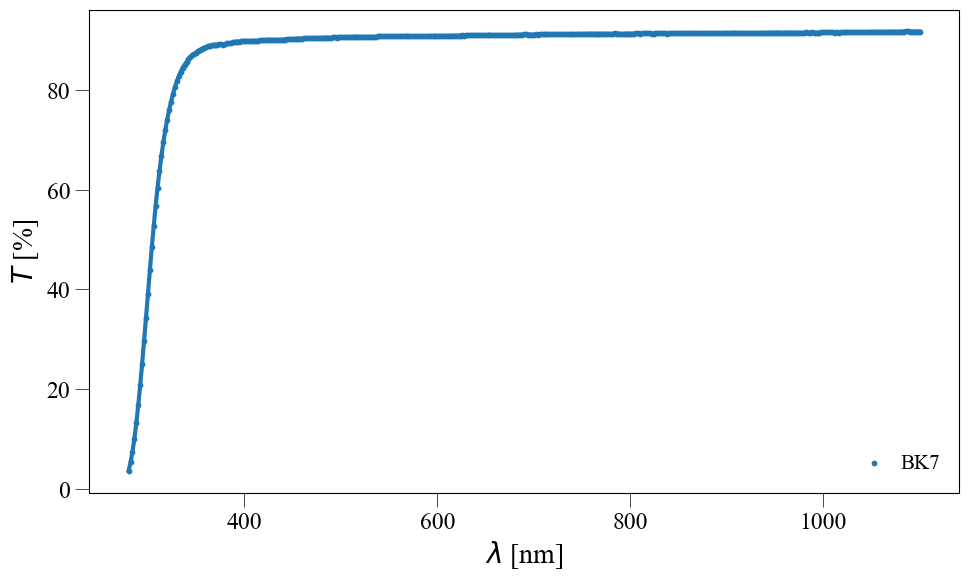

In [498]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$T$ [%]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(BK7['lambda'], BK7['T'], color=colors[5], marker='o', s=10, label='BK7')
ax.plot(BK7['lambda'], BK7['T'], color=colors[5], linewidth=3,)

handles, labels = ax.get_legend_handles_labels()
order = [0]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="lower right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/bk7_1.png', bbox_inches='tight')

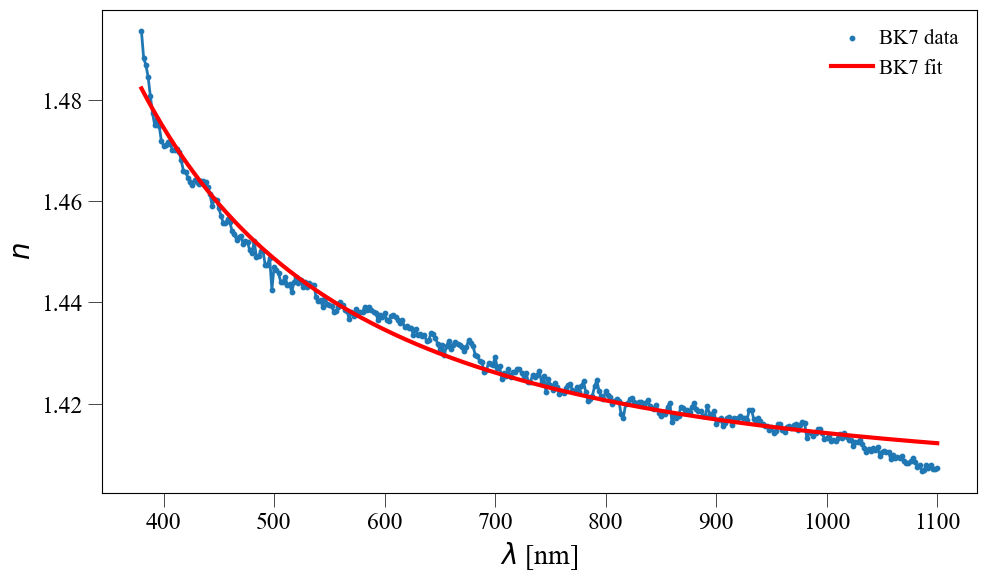

In [499]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$n$")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(BK7['lambda'][50:], BK7['n'][50:], color=colors[5], marker='o', s=10, label='BK7 data')
ax.plot(BK7['lambda'][50:], BK7['n'][50:], color=colors[5], linewidth=2,)
ax.plot(BK7['lambda'][50:], n_val, color='red', linewidth=3, label='BK7 fit')

handles, labels = ax.get_legend_handles_labels()
order = [0,1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/bk7_2.png', bbox_inches='tight')

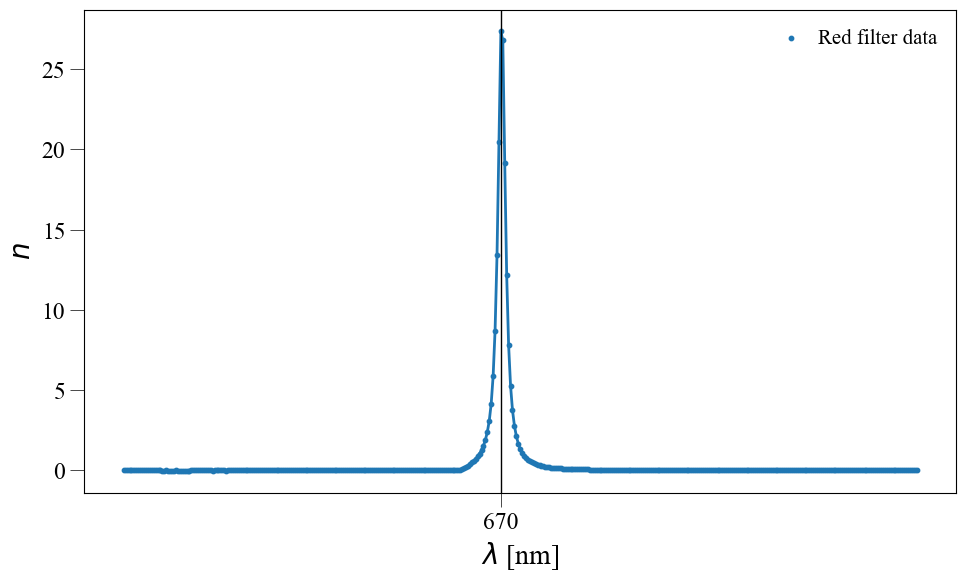

In [500]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$n$")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
plt.xticks([670])
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(RED['lambda'], RED['T'], color=colors[5], marker='o', s=10, label='Red filter data')
ax.plot(RED['lambda'], RED['T'], color=colors[5], linewidth=2)
ax.axvline(x=670, color='black', linestyle='-', linewidth=1)

handles, labels = ax.get_legend_handles_labels()
order = [0]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/red.png', bbox_inches='tight')

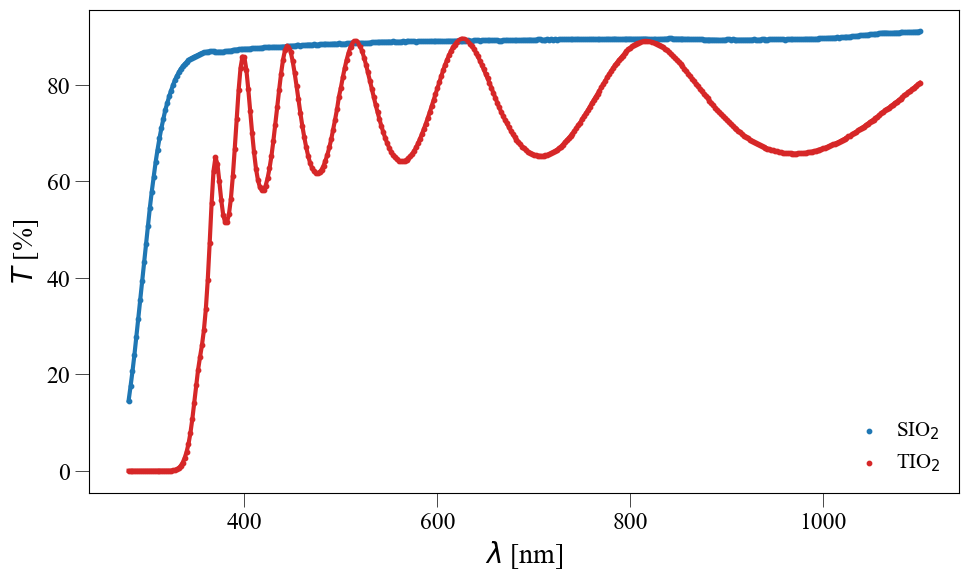

In [501]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$T$ [%]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(SIO2['lambda'], SIO2['T'], color=colors[5], marker='o', s=10, label=r'SIO$_2$')
ax.plot(SIO2['lambda'], SIO2['T'], color=colors[5], linewidth=3)
ax.scatter(TIO2['lambda'], TIO2['T'], color=colors[1], marker='o', s=10, label=r'TIO$_2$')
ax.plot(TIO2['lambda'], TIO2['T'], color=colors[1], linewidth=3)

handles, labels = ax.get_legend_handles_labels()
order = [0,1]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="lower right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/sklo.png', bbox_inches='tight')

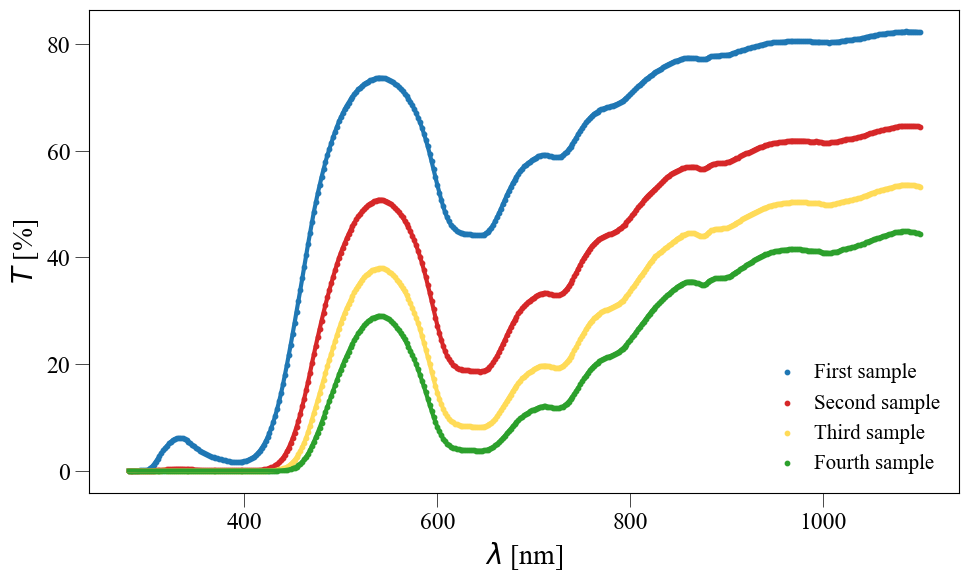

In [502]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$T$ [%]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(ALAM1['lambda'], ALAM1['T'], color=colors[5], marker='o', s=10, label='First sample')
ax.plot(ALAM1['lambda'], ALAM1['T'], color=colors[5], linewidth=3)
ax.scatter(ALAM2['lambda'], ALAM2['T'], color=colors[1], marker='o', s=10, label='Second sample')
ax.plot(ALAM2['lambda'], ALAM2['T'], color=colors[1], linewidth=3)
ax.scatter(ALAM3['lambda'], ALAM3['T'], color=colors[2], marker='o', s=10, label='Third sample')
ax.plot(ALAM3['lambda'], ALAM3['T'], color=colors[2], linewidth=3)
ax.scatter(ALAM4['lambda'], ALAM4['T'], color=colors[3], marker='o', s=10, label='Fourth sample')
ax.plot(ALAM4['lambda'], ALAM4['T'], color=colors[3], linewidth=3)

handles, labels = ax.get_legend_handles_labels()
order = [0,1,2,3]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="lower right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/alam.png', bbox_inches='tight')

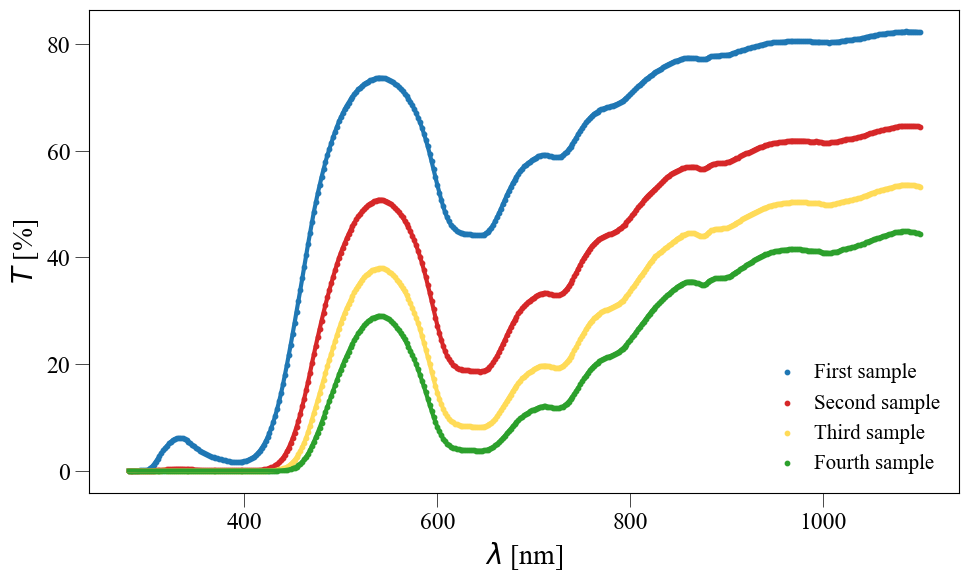

In [503]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$T$ [%]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(ALAM1['lambda'], ALAM1['T'], color=colors[5], marker='o', s=10, label='First sample')
ax.plot(ALAM1['lambda'], ALAM1['T'], color=colors[5], linewidth=3)
ax.scatter(ALAM2['lambda'], ALAM2['T'], color=colors[1], marker='o', s=10, label='Second sample')
ax.plot(ALAM2['lambda'], ALAM2['T'], color=colors[1], linewidth=3)
ax.scatter(ALAM3['lambda'], ALAM3['T'], color=colors[2], marker='o', s=10, label='Third sample')
ax.plot(ALAM3['lambda'], ALAM3['T'], color=colors[2], linewidth=3)
ax.scatter(ALAM4['lambda'], ALAM4['T'], color=colors[3], marker='o', s=10, label='Fourth sample')
ax.plot(ALAM4['lambda'], ALAM4['T'], color=colors[3], linewidth=3)

handles, labels = ax.get_legend_handles_labels()
order = [0,1,2,3]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="lower right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/alam.png', bbox_inches='tight')

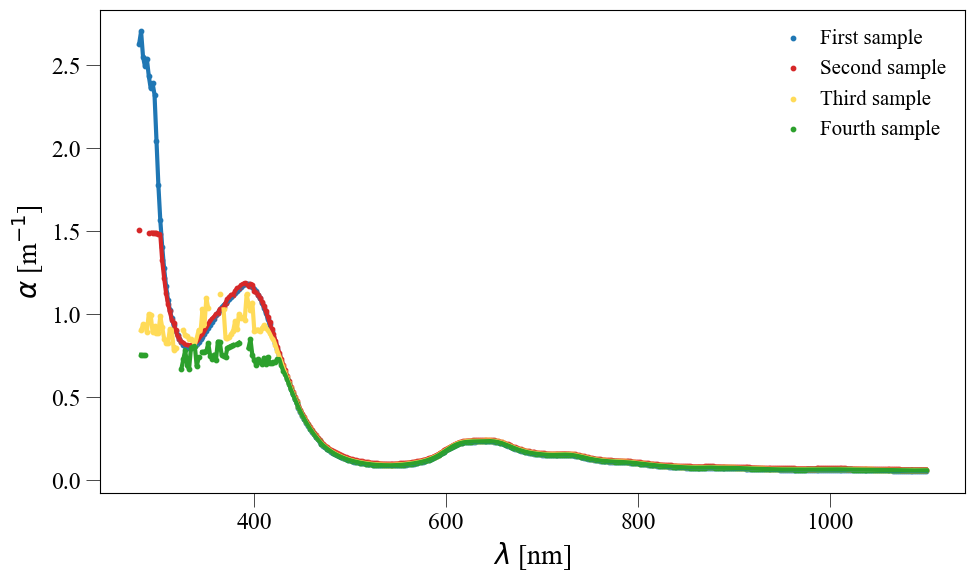

In [504]:
# Plot the data 

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 6))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$\lambda$ [nm]")
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel(r"$\alpha$ [m$^{-1}$]")
ax.yaxis.label.set_fontsize(20)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=17)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=17)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.scatter(ALAM1['lambda'], ALAM1['alpha'], color=colors[5], marker='o', s=10, label='First sample')
ax.plot(ALAM1['lambda'], ALAM1['alpha'], color=colors[5], linewidth=3)
ax.scatter(ALAM2['lambda'], ALAM2['alpha'], color=colors[1], marker='o', s=10, label='Second sample')
ax.plot(ALAM2['lambda'], ALAM2['alpha'], color=colors[1], linewidth=3)
ax.scatter(ALAM3['lambda'], ALAM3['alpha'], color=colors[2], marker='o', s=10, label='Third sample')
ax.plot(ALAM3['lambda'], ALAM3['alpha'], color=colors[2], linewidth=3)
ax.scatter(ALAM4['lambda'], ALAM4['alpha'], color=colors[3], marker='o', s=10, label='Fourth sample')
ax.plot(ALAM4['lambda'], ALAM4['alpha'], color=colors[3], linewidth=3)

# ax.axvline(x=425, color='black', linestyle='-', linewidth=1)

handles, labels = ax.get_legend_handles_labels()
order = [0,1,2,3]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper right", 
        #   bbox_to_anchor=(1, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)


plt.show() 

fig.savefig('images/alpha.png', bbox_inches='tight')